In [22]:
import pandas as pd
import numpy as	np
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy

In [2]:
PATH = "../../../DataCleaning/"

In [3]:
df = pd.read_csv(PATH + "Atmospheric Data Cleaned Instances Per Day.csv")

In [4]:
df.head()

,Year,Month,Day,O3,NO2,NO,CO,PM10,PM2.5,Temp_Avg,RH_Avg,WSpeed_Avg,WDir_Avg,Press_Avg,Rad_Avg,Rain_Tot
0,2023,5,1,42.098597,2.377042,0.378701,0.269903,32.476493,20.131194,19.830514,29.753889,2.439608,154.966895,804.314569,630.264466,0.0
1,2023,5,2,44.560389,1.889646,0.215486,0.244556,28.960708,18.765649,20.916111,27.642535,2.883990,231.153622,803.925649,659.373538,0.0
2,2023,5,3,50.777618,4.491722,0.745514,0.397743,49.597222,35.021854,21.357729,30.954847,1.604234,178.251752,803.767500,485.725435,0.0
3,2023,5,4,50.881806,4.101944,0.455646,0.384681,48.555437,35.872396,21.968729,35.661208,1.729689,183.150144,804.870299,422.336301,0.0
4,2023,5,5,52.673167,4.675542,0.458521,0.442660,52.817632,41.230729,21.668757,42.649750,1.900280,137.419527,805.930109,449.436559,0.2


In [5]:
airQuality = ["O3", "NO2", "NO", "CO", "PM10", "PM2.5"]

In [6]:
df_subset = df[airQuality]

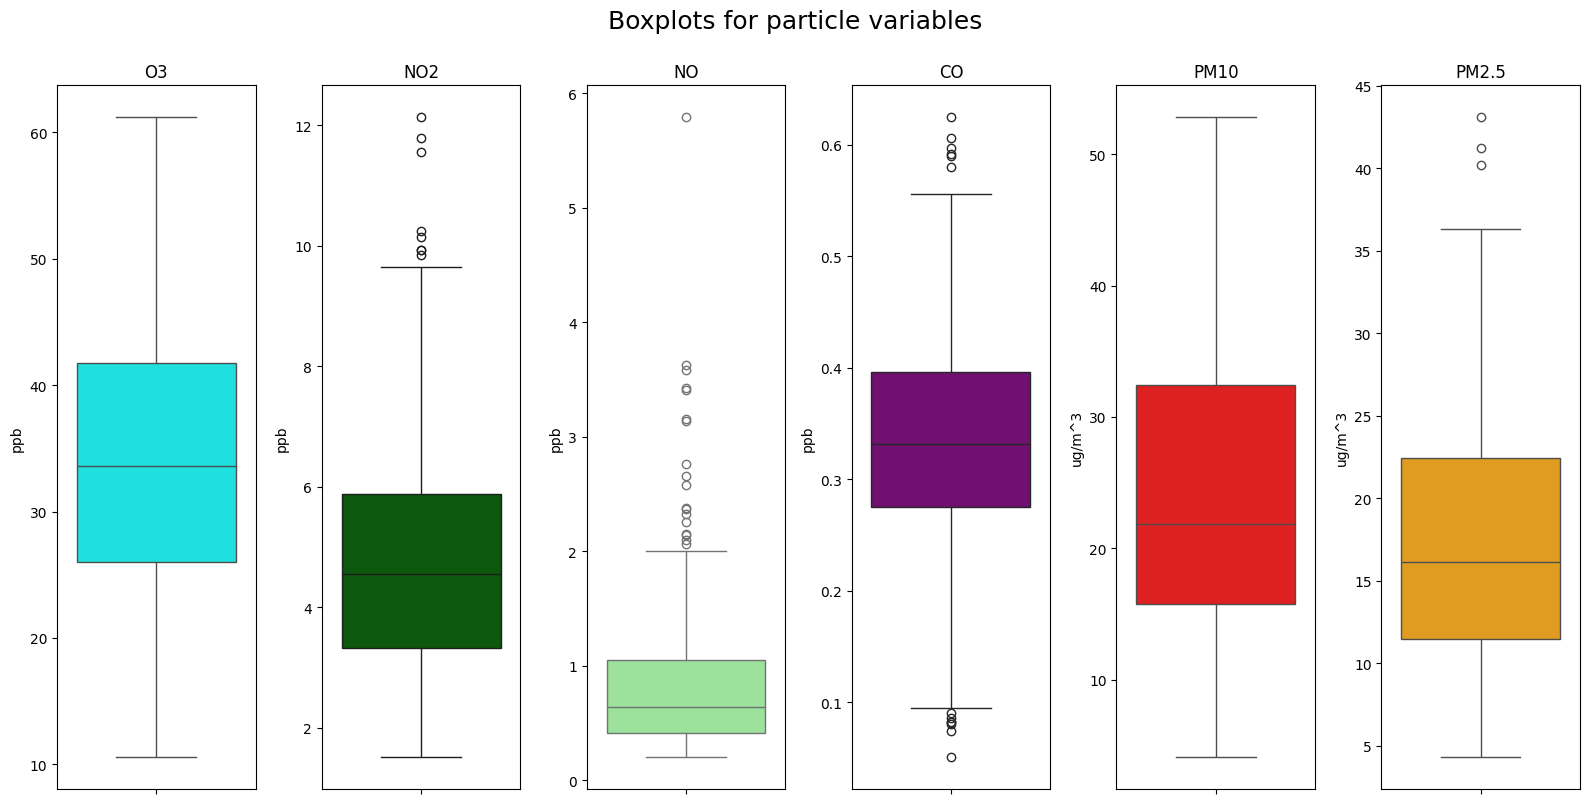

In [9]:
colors = ["cyan", "darkgreen", "lightgreen", "purple", "red", "orange"]
fig, axes = plt.subplots(nrows = 1, ncols = len(df_subset.columns), figsize = (16,8))
for i, c in enumerate(df_subset.columns):
    box = sns.boxplot(df_subset[c], ax=axes[i], color=colors[i])
    axes[i].set_title(c)
    if c == "PM10" or c == "PM2.5": units = "ug/m^3"
    else: units = "ppb"
    axes[i].set_ylabel(units)
plt.suptitle("Boxplots for particle variables", fontsize = 18, y = 1)
plt.tight_layout()
plt.show()

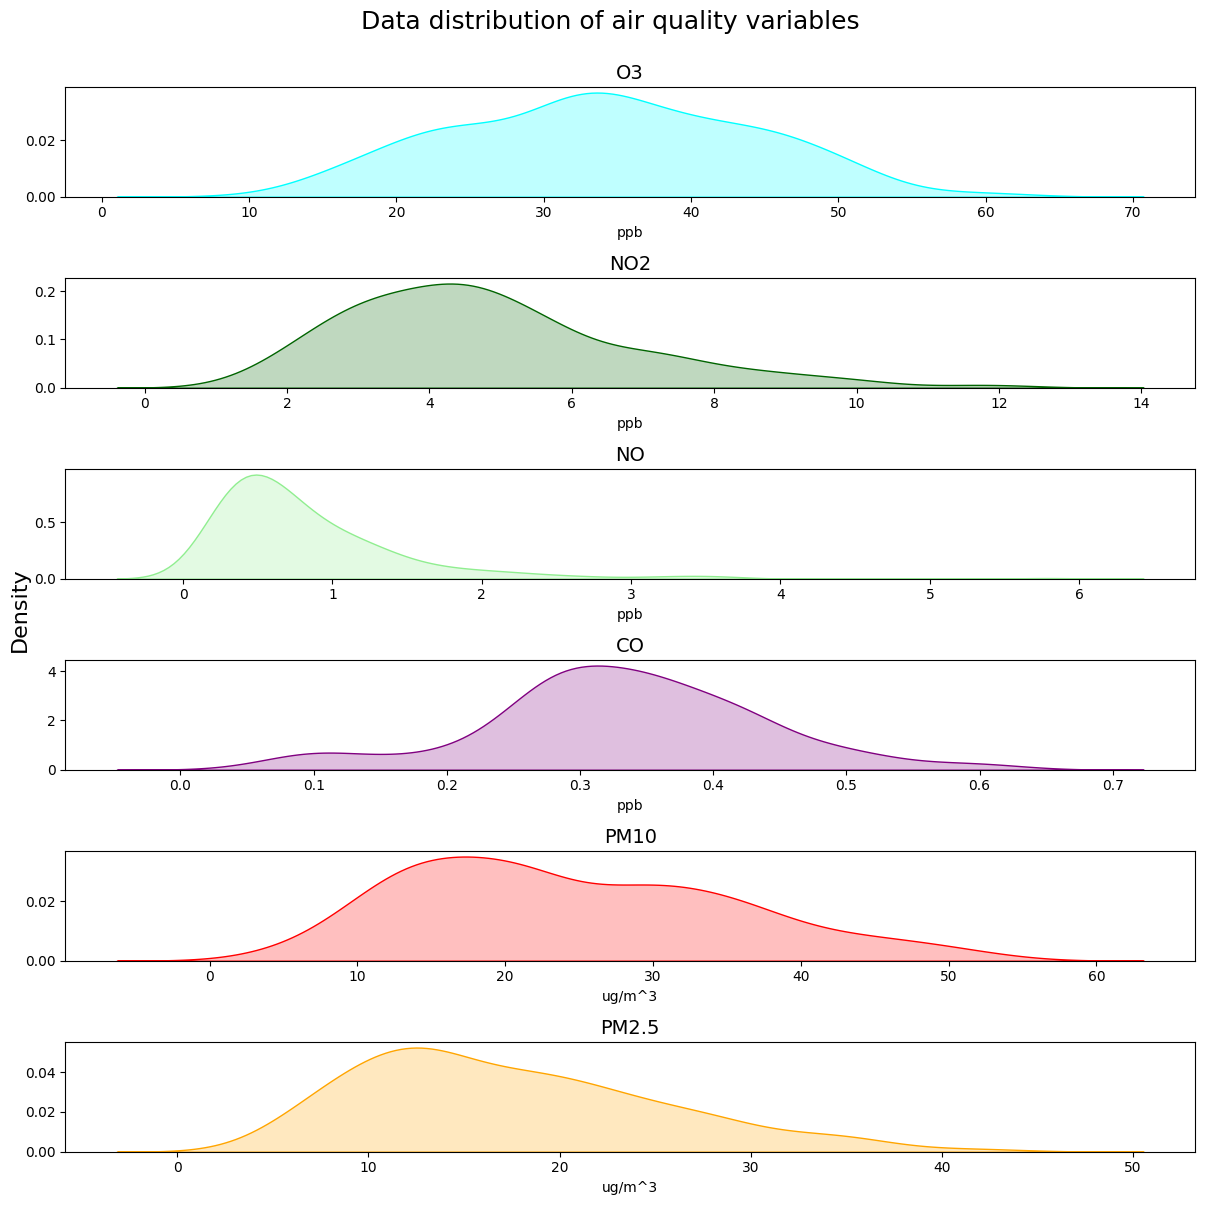

In [10]:
colors = ["cyan", "darkgreen", "lightgreen", "purple", "red", "orange"]
fig, axes = plt.subplots(nrows=len(df_subset.columns), ncols=1, figsize=(12,12))
for i, c in enumerate(df_subset.columns):
    density = sns.kdeplot(df_subset[c], ax=axes[i], color=colors[i], fill=True)
    axes[i].set_title(c, fontsize=14)
    if c == "PM10" or c == "PM2.5": units = "ug/m^3"
    else: units = "ppb"
    axes[i].set_xlabel(units)
    axes[i].set_ylabel(None)
fig.text(0, 0.5, "Density", va='center', rotation='vertical', fontsize=16) 
plt.suptitle("Data distribution of air quality variables", fontsize=18, y=1)
plt.tight_layout()
plt.show()

In [14]:
columns = ["Temp_Avg", "RH_Avg", "WSpeed_Avg", "WDir_Avg", "Rain_Tot", "Press_Avg", "Rad_Avg"]
df_meteorology = df[columns]

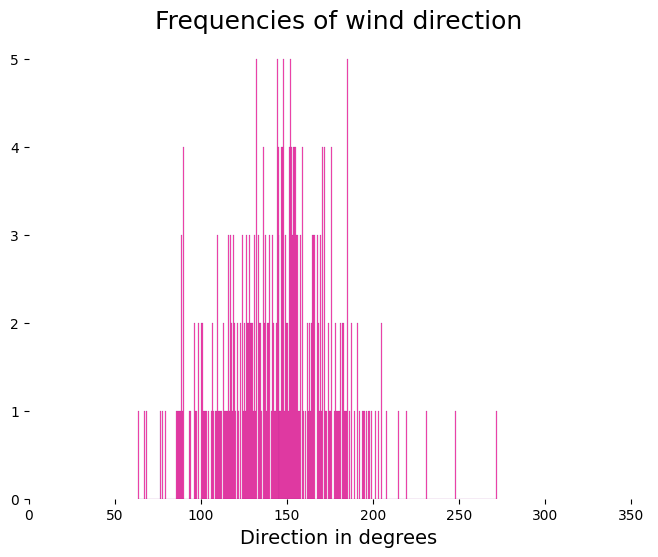

In [15]:
plt.figure(figsize=(8,6))
hist = sns.histplot(df_meteorology["WDir_Avg"], bins=360, color="deeppink", edgecolor="purple")
hist.set_xlim(0,360)
hist.set_xlabel("Direction in degrees", fontsize=14)
hist.set_ylabel(None)
hist.spines['top'].set_visible(False)
hist.spines['right'].set_visible(False)
hist.spines['left'].set_visible(False)
hist.spines['bottom'].set_visible(False)
plt.title("Frequencies of wind direction", fontsize=18)
plt.show()

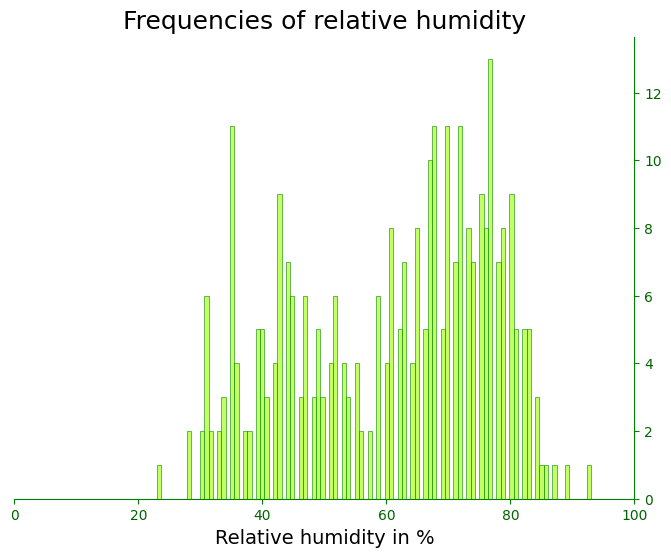

In [16]:
plt.figure(figsize=(8,6))
hist = sns.histplot(df_meteorology["RH_Avg"].apply(lambda x: round(x)), bins=101, color="greenyellow", edgecolor="green")
hist.set_xlim(0,100)
hist.set_xlabel("Relative humidity in %", fontsize=14)
hist.set_ylabel(None)
hist.spines['top'].set_visible(False)
hist.spines['left'].set_visible(False)
hist.spines['bottom'].set_edgecolor("green")
hist.spines['right'].set_edgecolor("green")
hist.tick_params(color='green', labelcolor='darkgreen', labelright=True, labelleft=False, left=False, right=True)
plt.title("Frequencies of relative humidity", fontsize=18)
plt.show()

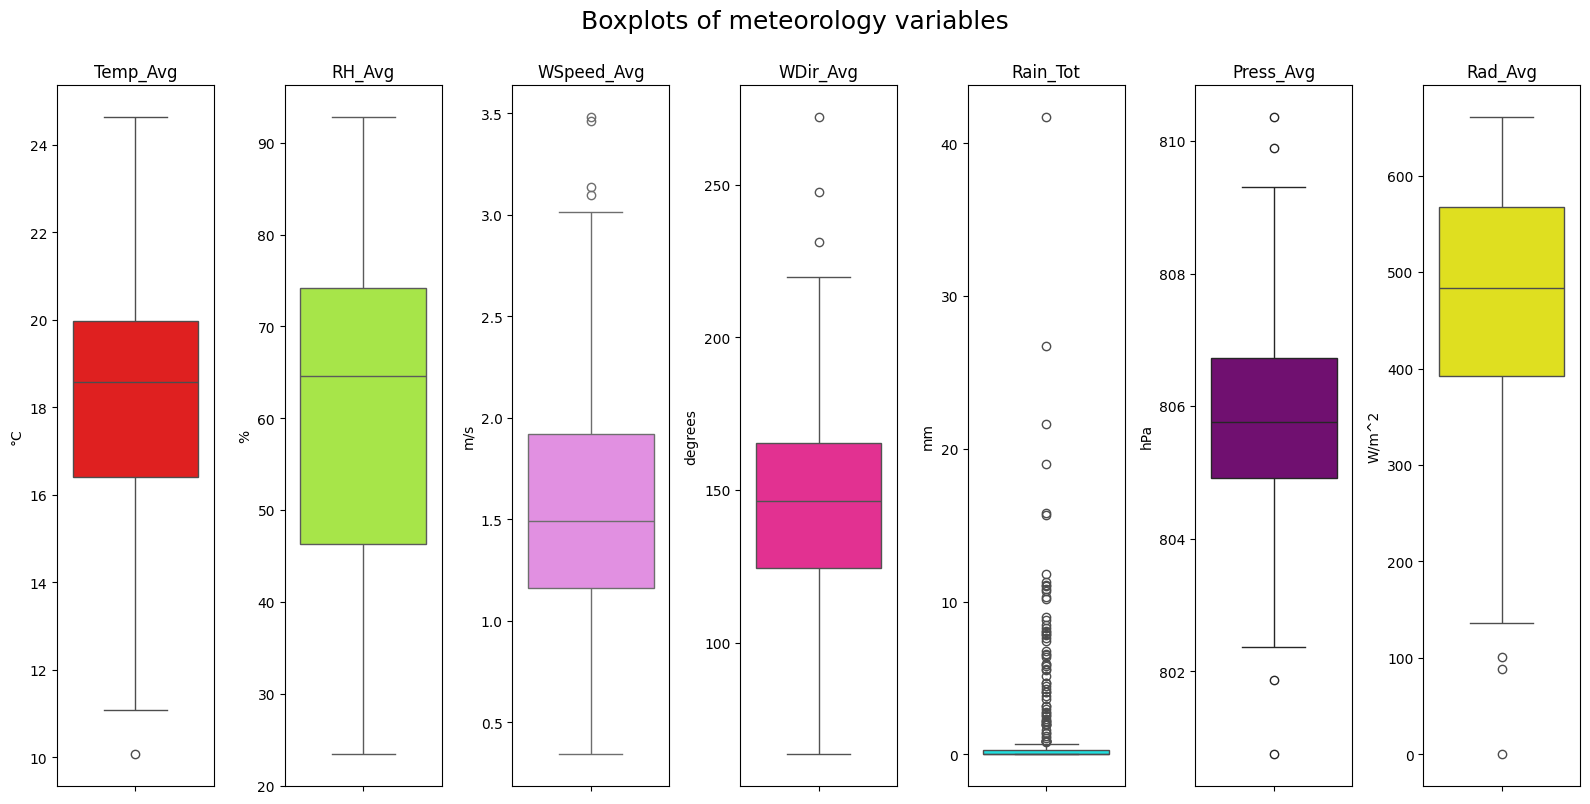

In [17]:
colors = ["red", "greenyellow", "violet", "deeppink", "cyan", "purple", "yellow"]
units = ["°C", "%", "m/s", "degrees", "mm", "hPa", "W/m^2"]
fig, axes = plt.subplots(nrows=1, ncols=len(df_meteorology.columns), figsize=(16,8))
for i, c in enumerate(df_meteorology.columns):
    box = sns.boxplot(df_meteorology[c], ax=axes[i], color=colors[i])
    axes[i].set_title(c)
    box.set_ylabel(units[i])
plt.suptitle("Boxplots of meteorology variables", fontsize=18, y=1)
plt.tight_layout()
plt.show()

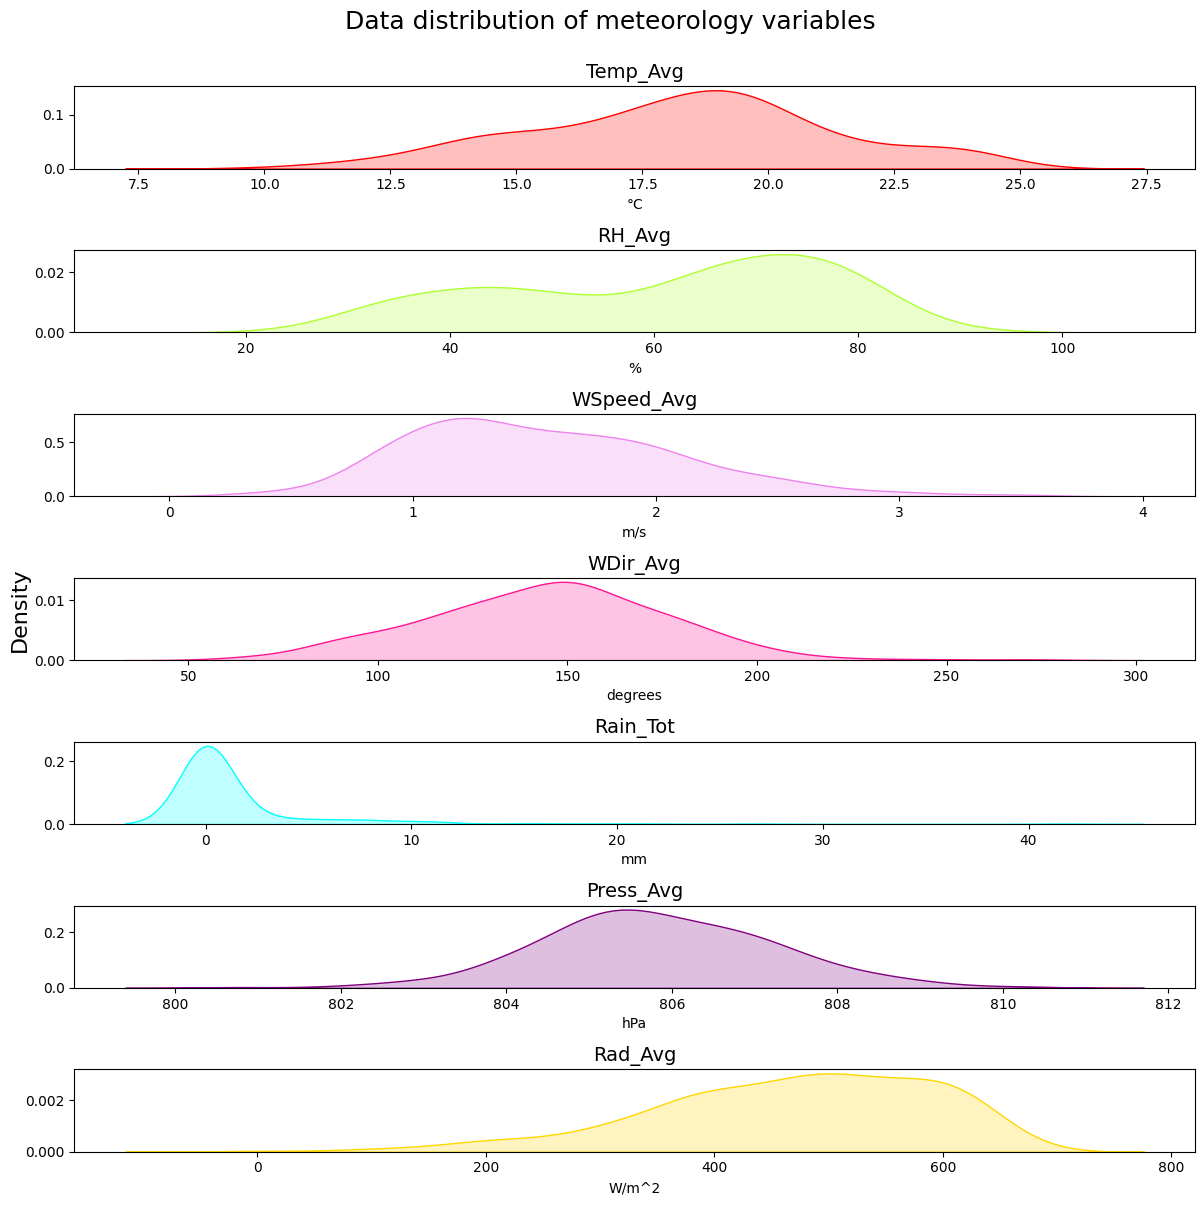

In [18]:
colors = ["red", "greenyellow", "violet", "deeppink", "cyan", "purple", "gold"]
units = ["°C", "%", "m/s", "degrees", "mm", "hPa", "W/m^2"]
fig, axes = plt.subplots(nrows=len(df_meteorology.columns), ncols=1, figsize=(12,12))
for i, c in enumerate(df_meteorology.columns):
    density = sns.kdeplot(df_meteorology[c], ax=axes[i], color=colors[i], fill=True)
    axes[i].set_title(c, fontsize=14)
    axes[i].set_xlabel(units[i])
    axes[i].set_ylabel(None)
fig.text(0, 0.5, "Density", va='center', rotation='vertical', fontsize=16) 
plt.suptitle("Data distribution of meteorology variables", fontsize=18, y=1)
plt.tight_layout()
plt.show()

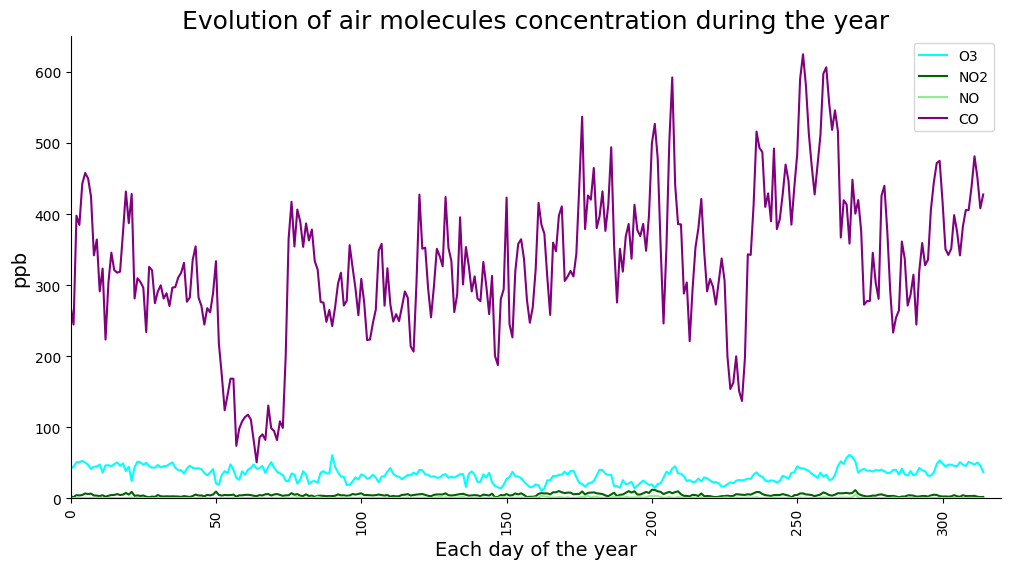

In [37]:
molecules = ["O3", "NO2", "NO", "CO"]
df_molecules = deepcopy(df[molecules])
df_molecules["CO"] = df_molecules["CO"].apply(lambda x:x*1000)

colors = ["cyan", "darkgreen", "lightgreen", "purple"]
plt.figure(figsize=(12,6))
plt.title("Evolution of air molecules concentration during the year", fontsize=18)
for i, c in enumerate(molecules):
    lines = sns.lineplot(x=range(df_molecules.shape[0]), y=df_molecules[c], color=colors[i], label=c)
    lines.legend(loc='best')
lines.spines["top"].set_visible(False)
lines.spines["right"].set_visible(False)
plt.ylim(0, 650)
plt.xlim(0, 320)
plt.ylabel("ppb", fontsize=14)
plt.xlabel("Each day of the year", fontsize=14)
plt.xticks(rotation=90)
plt.show()

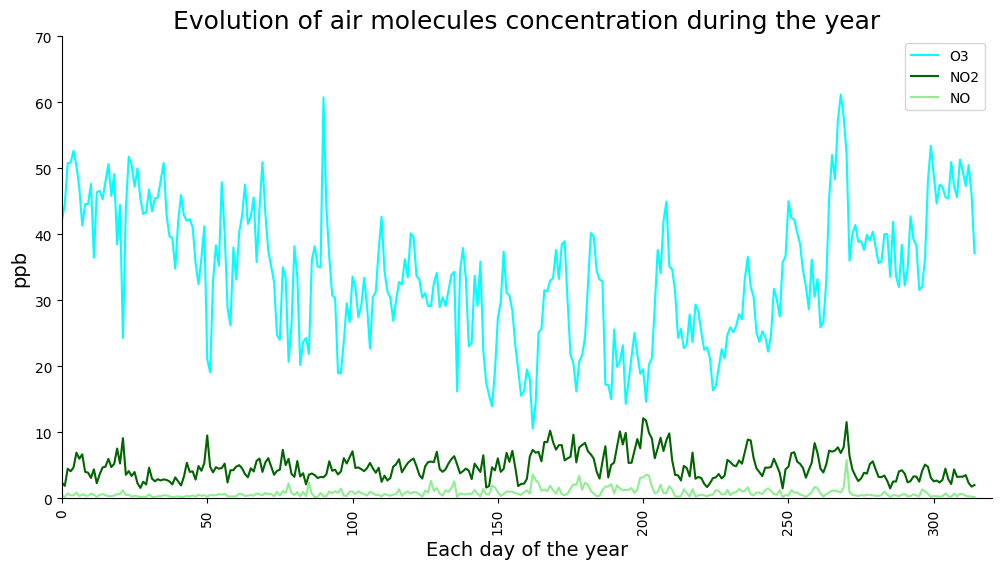

In [41]:
molecules = ["O3", "NO2", "NO"]
df_molecules = deepcopy(df[molecules])

colors = ["cyan", "darkgreen", "lightgreen", "purple"]
plt.figure(figsize=(12,6))
plt.title("Evolution of air molecules concentration during the year", fontsize=18)
for i, c in enumerate(molecules):
    lines = sns.lineplot(x=range(df_molecules.shape[0]), y=df_molecules[c], color=colors[i], label=c)
    lines.legend(loc='best')
lines.spines["top"].set_visible(False)
lines.spines["right"].set_visible(False)
plt.ylim(0, 70)
plt.xlim(0, 320)
plt.ylabel("ppb", fontsize=14)
plt.xlabel("Each day of the year", fontsize=14)
plt.xticks(rotation=90)
plt.show()

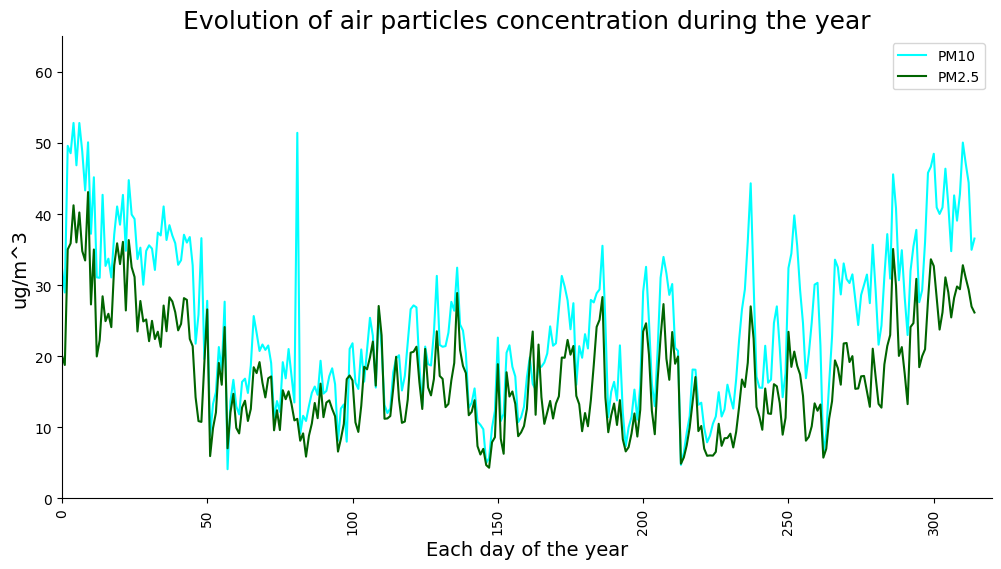

In [46]:
molecules = ["PM10", "PM2.5"]
colors = ["red", "orange"]
df_molecules = deepcopy(df[molecules])

colors = ["cyan", "darkgreen", "lightgreen", "purple"]
plt.figure(figsize=(12,6))
plt.title("Evolution of air particles concentration during the year", fontsize=18)
for i, c in enumerate(molecules):
    lines = sns.lineplot(x=range(df_molecules.shape[0]), y=df_molecules[c], color=colors[i], label=c)
    lines.legend(loc='best')
lines.spines["top"].set_visible(False)
lines.spines["right"].set_visible(False)
plt.ylim(0, 65)
plt.xlim(0, 320)
plt.ylabel("ug/m^3", fontsize=14)
plt.xlabel("Each day of the year", fontsize=14)
plt.xticks(rotation=90)
plt.show()